# 02_EDA
2025.04.02
> Portfolio_Allocation_5Assets
- 기간 : 2024-01-01 ~ 2025-02-28
- 종목   

| SamsungElectornics | SKHynix | Naver | Celltrion | LGDisplay |
| --- | --- | --- | --- | --- |
| 삼성전자 | SK하이닉스 | 네이버 | 셀트리온 | LG디스플레이 |


---
## 0. Loading

In [60]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정 (Windows 기준)
mpl.rc('axes', unicode_minus=False)  # 음수 기호 깨짐 방지

import warnings  # 경고 메시지 안 나오게 설정
warnings.filterwarnings("ignore")

import mplfinance as mpf

# 데이터 로드 (각 종목의 'Date', 'Open', 'High', 'Low', 'Close', 'Volume')
stocks = ["SamsungElectronics", "SKHynix", "Naver", "Celltrion", "LGDisplay"]
data = {stock: pd.read_csv(f"stock_data/{stock}.csv", parse_dates=["Date"], index_col=0) for stock in stocks}

# train : 2024년 데이터만 필터링하여 저장
train = {stock: df[df.index.year == 2024] for stock, df in data.items()}

---
## 1. 개별 종목 Candle Chart + Volume Chart
**Candle**
- 양봉(Red): 종가>시가 : 상승장
- 음봉(Blue): 종가<시가 : 하락장

**거래 강도**
- 막대의 높이 = 해당 시간 동안의 거래량

**추세**
  - 상승장/하락장에서 거래량이 크게 증가하면 강한 추세를 나타낼 가능성이 큼.
  - 거래량이 낮으면 시장 참여가 줄어들었음을 의미.

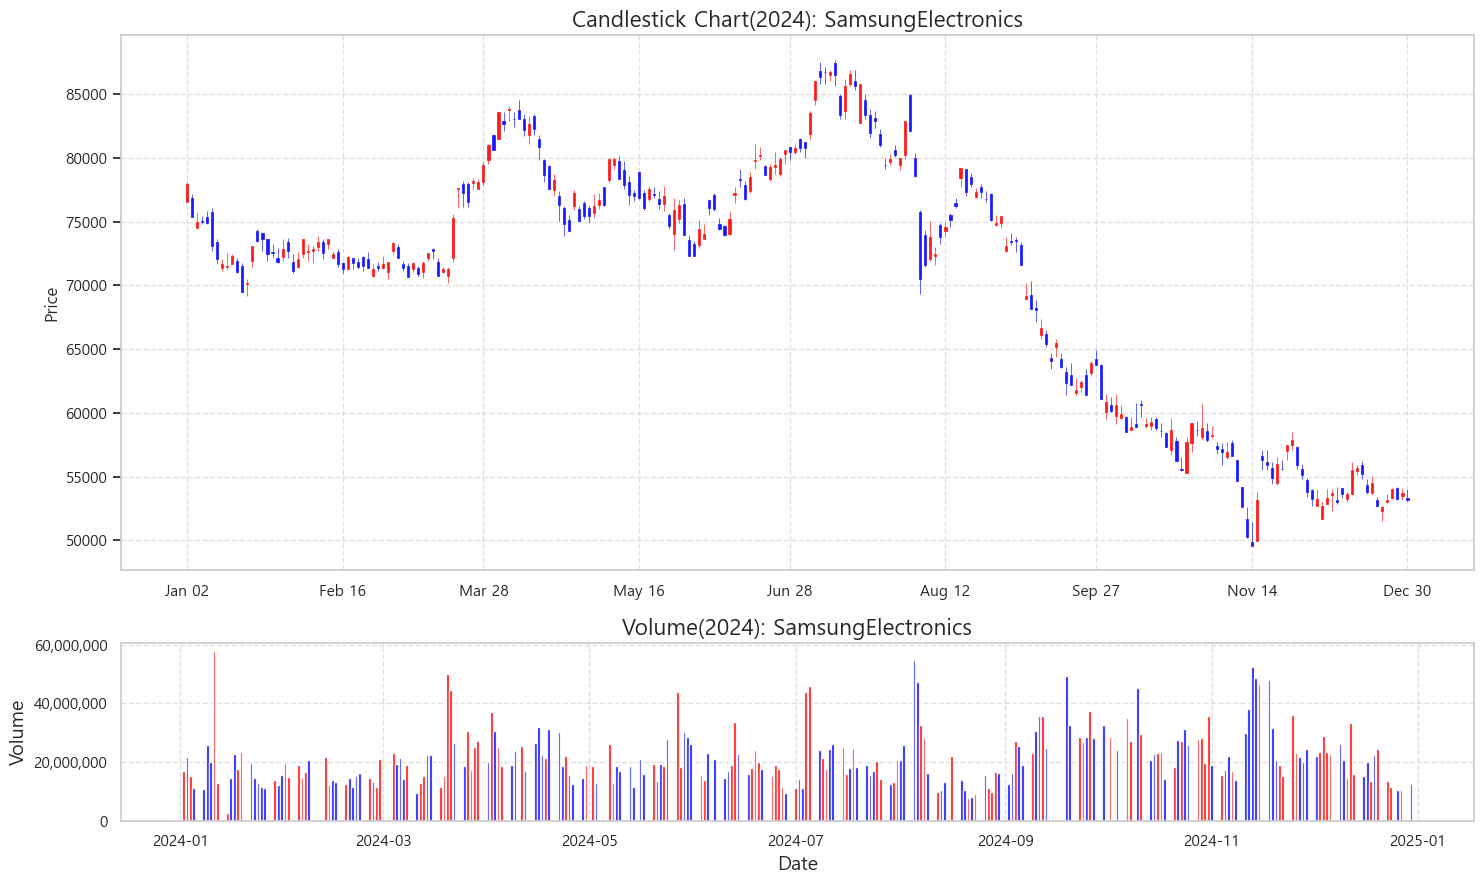

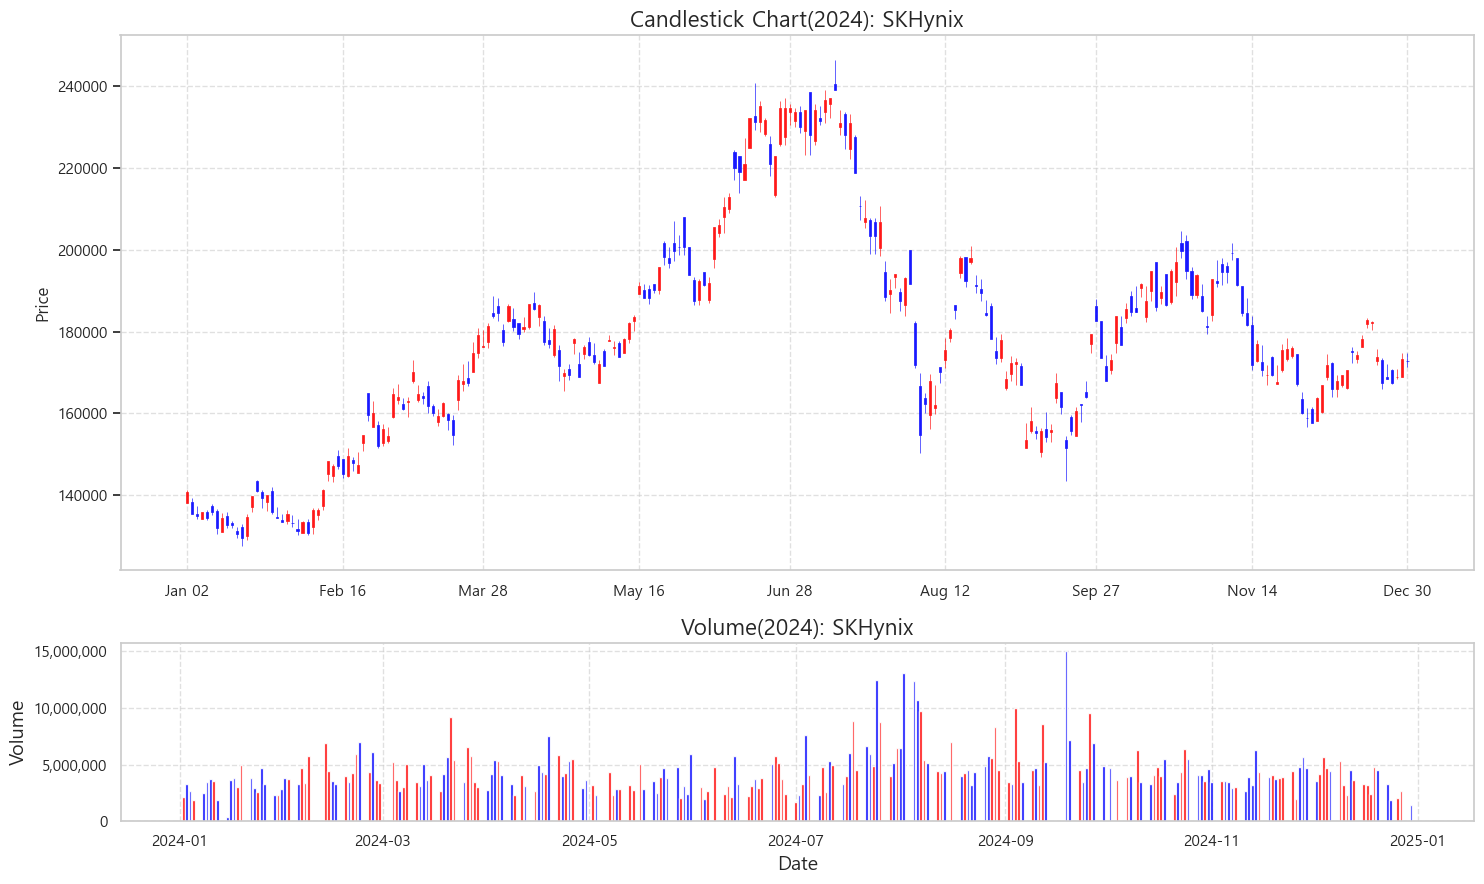

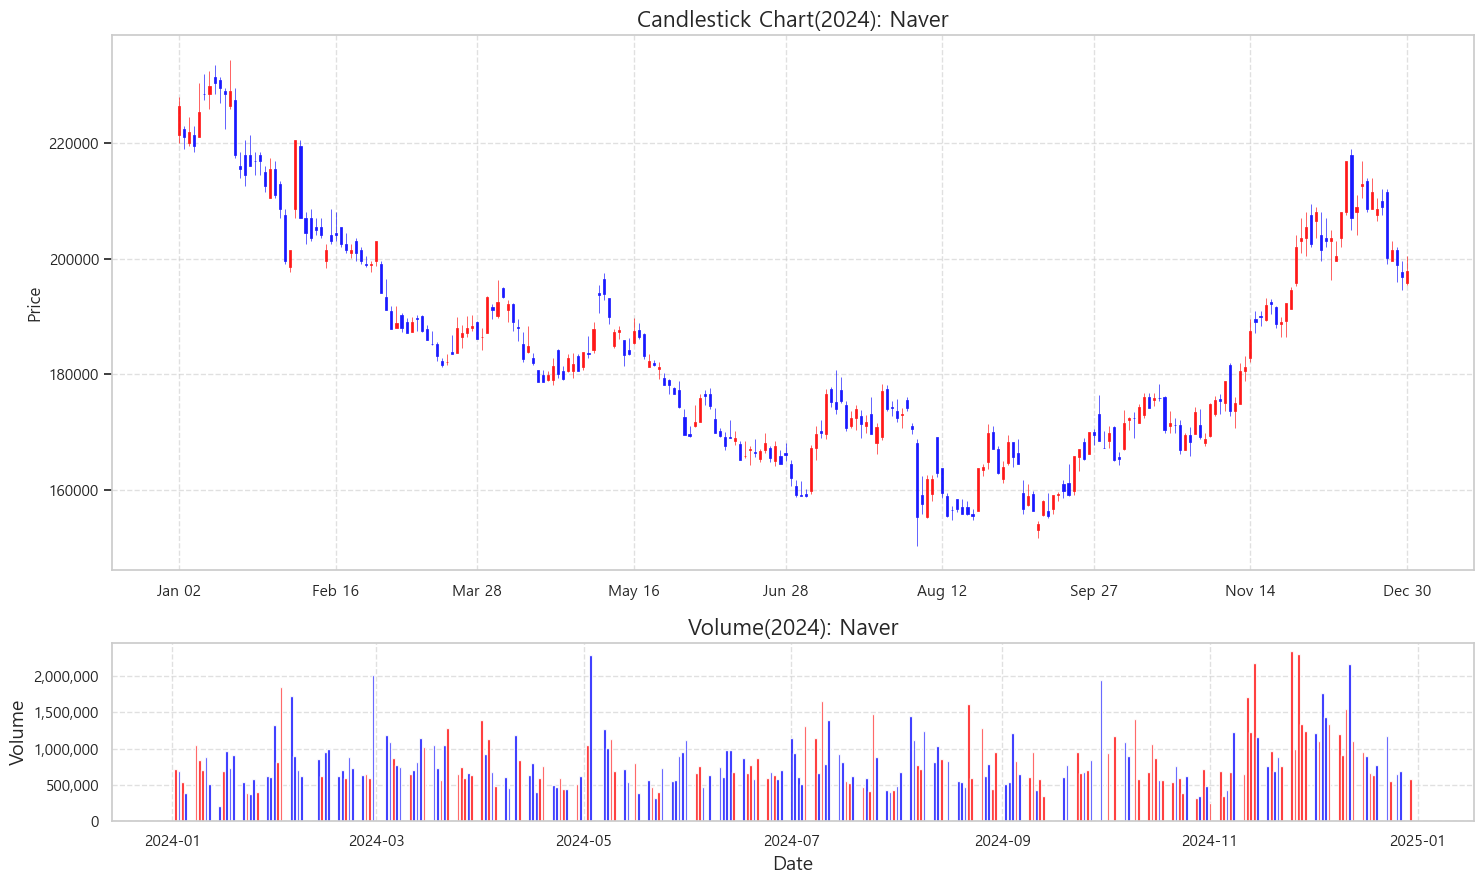

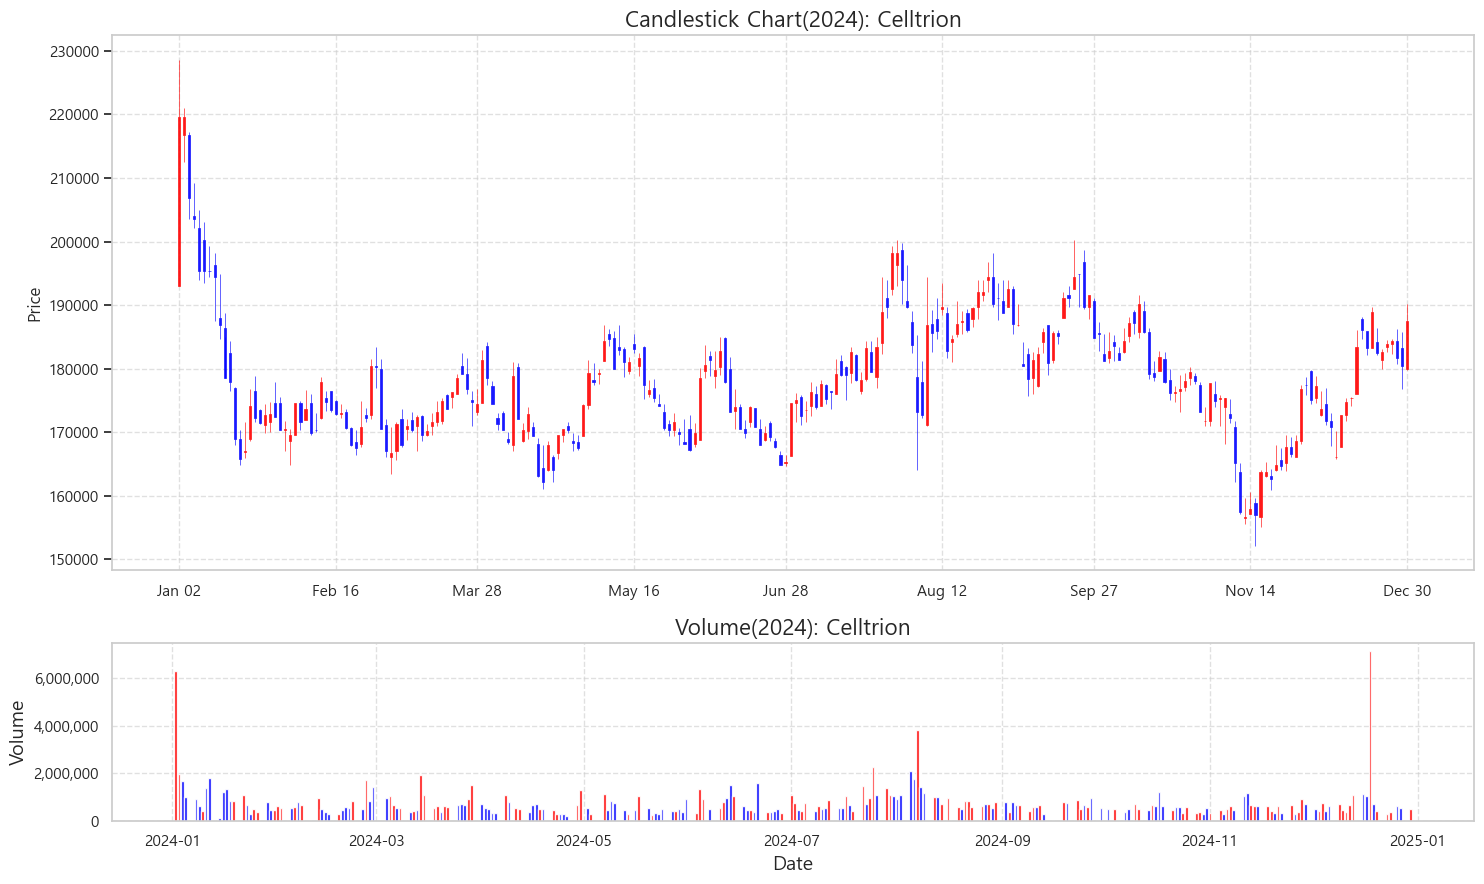

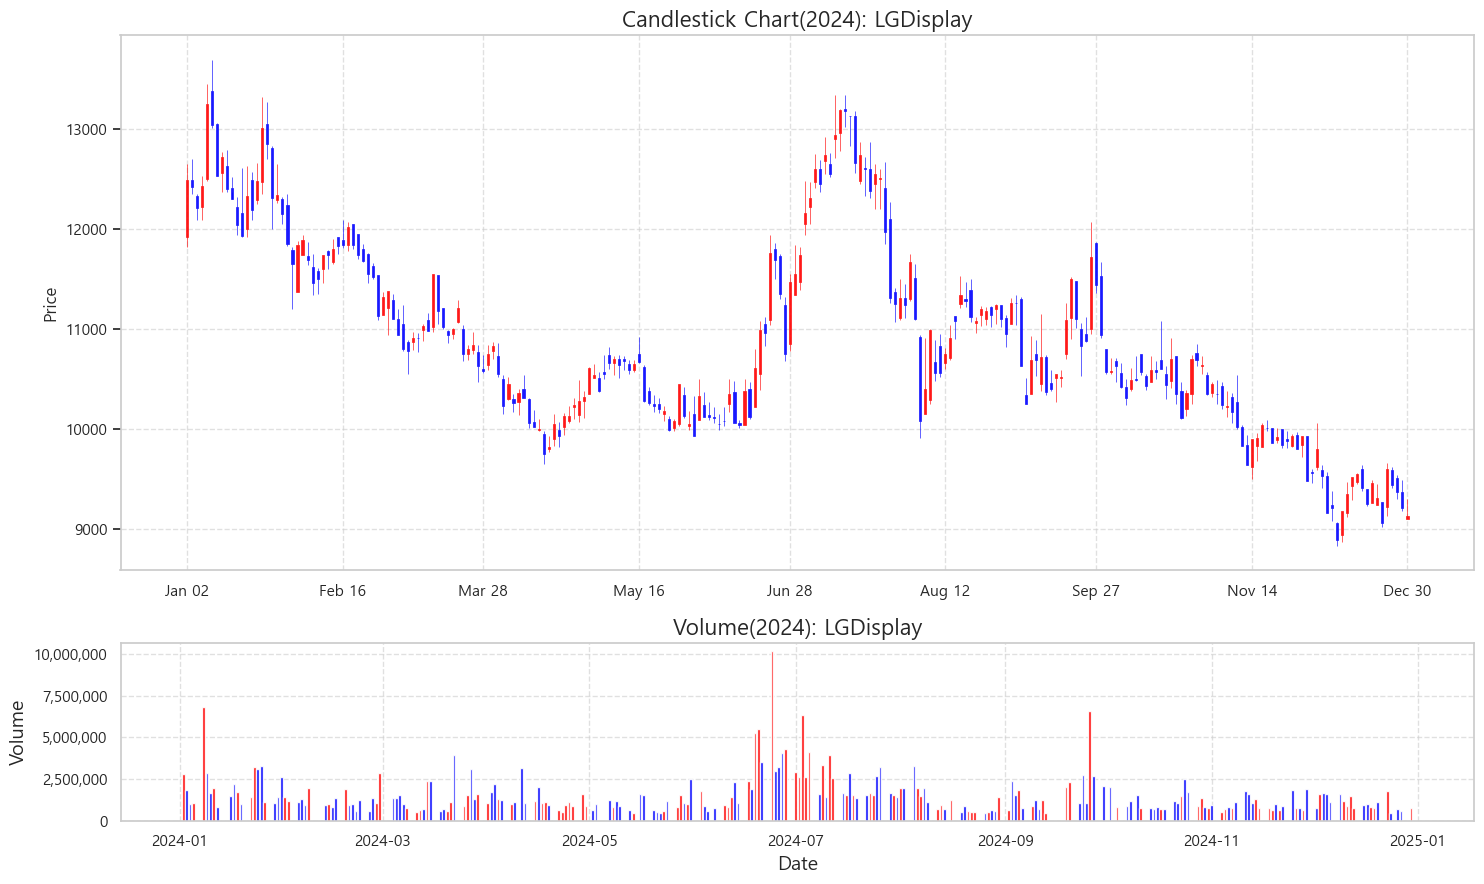

In [66]:
# 1. 개별 종목 캔들 차트
def candle_chart(df, stock_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9), gridspec_kw={'height_ratios': [3, 1]})

    # OHLC (시가, 고가, 저가, 종가)
    ohlc_data = df[['Open', 'High', 'Low', 'Close']]

    # 캔들 차트 색상 (한국식: 양봉=빨강, 음봉=파랑)
    market_colors = mpf.make_marketcolors(up='red', down='blue', edge='inherit', wick='inherit', volume='inherit')
    custom_style = mpf.make_mpf_style(marketcolors=market_colors)

    # 캔들 차트 플롯
    mpf.plot(ohlc_data, type='candle', ax=ax1, volume=False, style=custom_style,
             warn_too_much_data=len(df) + 1)  # 경고 비활성화
    ax1.set_title(f'Candlestick Chart(2024): {stock_name}', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.6)
    # xlabel 설정
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # 거래량 (Volume) 색상: 양봉=빨강, 음봉=파랑
    volume_colors = ['red' if close >= open_ else 'blue' for close, open_ in zip(df['Close'], df['Open'])]
    ax2.bar(df.index, df['Volume'], color=volume_colors, alpha=0.9, width=0.8)

    ax2.set_title(f'Volume(2024): {stock_name}', fontsize=16)
    ax2.set_ylabel('Volume', fontsize=14)
    ax2.set_xlabel('Date', fontsize=14)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax2.grid(True, linestyle='--', alpha=0.6)

    # 레이아웃 조정 및 표시
    plt.tight_layout()
    plt.show()

# 각 종목별로 차트 그리기
for stock, df in train.items():
    candle_chart(df, stock)